## Assignment 2: Create buffers around shopping centers 



### 

First, load the shopping centre *point* data set you created in *assignment 1* into a `GeoDataFrame` called `shopping_centres`.

In [9]:
# Libraries 
import pandas as pd
import geopandas as gpd 
import pathlib
import shapely.geometry
import matplotlib.pyplot as plt
import pyproj

# Load spatial file
NOTEBOOK_PATH = pathlib.Path().resolve()
shopping_centres = gpd.read_file(
    NOTEBOOK_PATH / "shopping_centres.gpkg"
)

# Extract the required columns
shopping_centres = shopping_centres[["id", "name", "address", "addr", "geometry"]]
#shopping_centres.plot()
shopping_centres.columns
#shopping_centres.geometry.name

Index(['id', 'name', 'address', 'addr', 'geometry'], dtype='object')

Calculate a 2 km buffer around the shopping locations. 
Use the geopandas.GeoDataFrame.buffer() method, that uses shapely’s buffer() in the background.

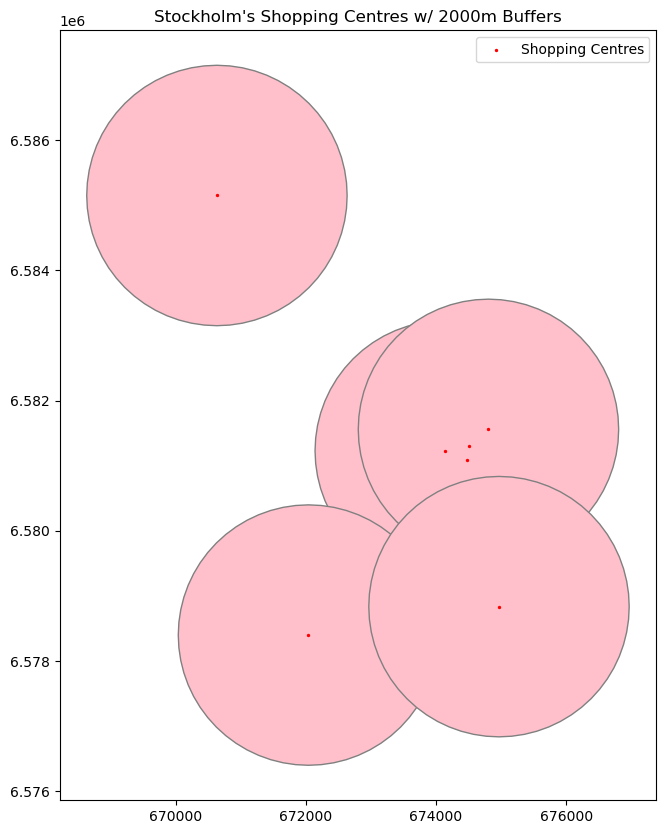

   id                           name  \
0   1  Westfield Mall of Scandinavia   
1   2                 MOOD STOCKHOLM   
2   3                      Gallerian   
3   4                Hötorgspassagen   
4   5                 Sturegallerian   
5   6      Liljeholmstorget Galleria   
6   7                        Skrapan   

                                             address  \
0  Westfield Mall of Scandinavia, 2, Stjärntorget...   
1  48, Regeringsgatan, Klara, Norrmalm, Norra inn...   
2  37, Hamngatan, Klara, Norrmalm, Norra innersta...   
3  Drottninggatan, Klara, Norrmalm, Norra innerst...   
4  4, Sturegatan, Villastaden, Östermalm, Norra i...   
5  38, Nybohovsbacken, Nybohov, Liljeholmen, Häge...   
6  78, Götgatan, Skanstull, Södermalm, Södermalms...   

                                  addr                        geometry  \
0         Stjärntorget 2, 169 79 Solna  POINT (670635.567 6585150.741)   
1  Regeringsgatan 48, 111 44 Stockholm    POINT (674509.029 6581308.9)   
2       

In [10]:
# Craete buffer polygon 
shopping_centres["buffer"] = shopping_centres.geometry.buffer(2000)

# Plot results
fig, ax1 = plt.subplots(figsize=(10, 10))

# Plot buffer
shopping_centres["buffer"].plot(ax = ax1, edgecolor = "gray" , facecolor = "pink")

# Plot shopping centres (Point)
shopping_centres["geometry"].plot(ax = ax1, marker ='o', color = "red", markersize = 2, label = "Shopping Centres")


# Test plot
plt.title("Stockholm's Shopping Centres w/ 2000m Buffers")
plt.legend()
plt.show()
print(shopping_centres)

Save the data frame containing the buffer geometries into a new layer `buffers` as a .gpkg or .shp. Your buffers layer should contain the information for the shopping centers as well.

In [16]:
# Rename and change column name
shopping_centres.set_geometry("buffer", inplace=True)

print(shopping_centres)

# export
shopping_centres[["id", "name", "buffer"]].to_file("buffers.gpkg")





   id                           name  \
0   1  Westfield Mall of Scandinavia   
1   2                 MOOD STOCKHOLM   
2   3                      Gallerian   
3   4                Hötorgspassagen   
4   5                 Sturegallerian   
5   6      Liljeholmstorget Galleria   
6   7                        Skrapan   

                                             address  \
0  Westfield Mall of Scandinavia, 2, Stjärntorget...   
1  48, Regeringsgatan, Klara, Norrmalm, Norra inn...   
2  37, Hamngatan, Klara, Norrmalm, Norra innersta...   
3  Drottninggatan, Klara, Norrmalm, Norra innerst...   
4  4, Sturegatan, Villastaden, Östermalm, Norra i...   
5  38, Nybohovsbacken, Nybohov, Liljeholmen, Häge...   
6  78, Götgatan, Skanstull, Södermalm, Södermalms...   

                                  addr                        geometry  \
0         Stjärntorget 2, 169 79 Solna  POINT (670635.567 6585150.741)   
1  Regeringsgatan 48, 111 44 Stockholm    POINT (674509.029 6581308.9)   
2       

In [13]:
shopping_centres.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

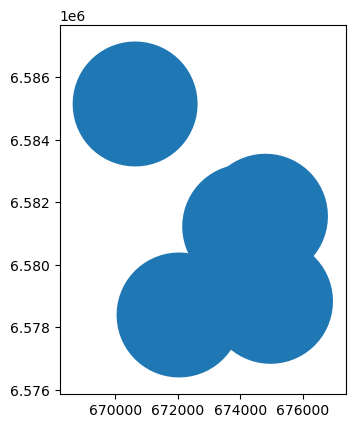

In [14]:
shopping_centres.plot()